# Spectrum Protect Summary Table Analysis

Created by: Robert Hartwig
Last edited:  November 26, 2020
Verison: 2.0

This Jupyter notebook analysis the a Spectrum Protect instance summary table to graph the daily backup ingest
and daily restore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Download a sample Spectrum Protect summary table from IBM Cloud bucket.

In [2]:
!wget -O summary.txt https://cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud/summary.txt
# df = pd.read_csv('/Users/rhartwig/workspace/nhs/TSM_Troubleshooting/summary/summary.txt', skiprows=9, header=None)
# df = pd.read_csv('/Users/rhartwig/workspace/nhs/TSM_Troubleshooting/summary/summary_TSM3.txt', skiprows=9, header=None)
# df = pd.read_csv('/Users/rhartwig/workspace/nhs/TSM_Troubleshooting/summary/summary_TSM2', skiprows=9, header=None)
# df = pd.read_csv('/Users/rhartwig/workspace/nhs/TSM_Troubleshooting/summary/SUMMARY_SCTSM03.log', skiprows=9, header=None)

--2020-11-27 03:16:27--  https://cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud/summary.txt
Resolving cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud (cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud)... 169.63.118.98
Connecting to cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud (cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud)|169.63.118.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4569083 (4.4M) [application/octet-stream]
Saving to: ‘summary.txt’

summary.txt         100%[===================>]   4.36M   584KB/s    in 7.5s    

2020-11-27 03:16:35 (593 KB/s) - ‘summary.txt’ saved [4569083/4569083]



### Drop the last 2 rows in the dataframe. Spectrum Protect 7.x summary table last 2 rows have NAN data that causes problems 
### when doing the analysis.

In [3]:
# df.drop(df.tail(2).index,inplace=True) # drop last n rows

### Load the summary.txt file into a dataframe.  Skipping the first 9 rows of the summary.txt as it is just comments.

In [4]:
df = pd.read_csv('summary.txt', skiprows=9, header=None)

### Naming to the colums as using the following IBM Knowledge Center Spectrum Protect 7.1 page.

https://www.ibm.com/support/knowledgecenter/SSGSG7_7.1.0/com.ibm.itsm.srv.doc/t_sql_activity_summ_tbl_querying.html

If the number of columns is 22, then this most likely a TSM 6.3 instance.  

If the number of columns is 26, then this most likely a Spectrum Protect 7.x/8.x instance.

In [5]:
df.shape

(35910, 22)

In [6]:
if df.shape[1]==26:
    df.columns = ["START_TIME:", "END_TIME:", "ACTIVITY:", "NUMBER:", "ENTITY:", "COMMMETH:", "ADDRESS:", "SCHEDULE_NAME:", "EXAMINED:", "AFFECTED:", "FAILED:", "BYTES:", "IDLE:", "MEDIAW:", "PROCESSES:", "SUCCESSFUL:", "VOLUME_NAME:", "DRIVE_NAME:", "LIBRARY_NAME:", "LAST_USE:", "COMM_WAIT:", "NUM_OFFSITE_VOLS:", "UNKNOWN1", "UNKNOWN2", "UNKNOWN3", "UNKNOWN4"]
elif df.shape[1]==22:
    df.columns = ["START_TIME:", "END_TIME:", "ACTIVITY:", "NUMBER:", "ENTITY:", "COMMMETH:", "ADDRESS:", "SCHEDULE_NAME:", "EXAMINED:", "AFFECTED:", "FAILED:", "BYTES:", "IDLE:", "MEDIAW:", "PROCESSES:", "SUCCESSFUL:", "VOLUME_NAME:", "DRIVE_NAME:", "LIBRARY_NAME:", "LAST_USE:", "COMM_WAIT:", "NUM_OFFSITE_VOLS:"]

In [7]:
df = df.sort_values(by=['START_TIME:'], ascending=True)

In [8]:
list(df.columns)

['START_TIME:',
 'END_TIME:',
 'ACTIVITY:',
 'NUMBER:',
 'ENTITY:',
 'COMMMETH:',
 'ADDRESS:',
 'SCHEDULE_NAME:',
 'EXAMINED:',
 'AFFECTED:',
 'FAILED:',
 'BYTES:',
 'IDLE:',
 'MEDIAW:',
 'PROCESSES:',
 'SUCCESSFUL:',
 'VOLUME_NAME:',
 'DRIVE_NAME:',
 'LIBRARY_NAME:',
 'LAST_USE:',
 'COMM_WAIT:',
 'NUM_OFFSITE_VOLS:']

### Make sure that there are no NAN values in the START_TIME:, END_TIME:, and BYTES: rows.

In [9]:
df[df['START_TIME:'].isnull()]

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:


In [10]:
df[df['END_TIME:'].isnull()]

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:


In [11]:
df[df['BYTES:'].isnull()]

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:


### Convert the START_TIME and END_TIME from string to datetime format

In [12]:
df['START_TIME:'].astype('datetime64')

8258    2016-11-06 00:00:44
8267    2016-11-06 00:00:44
8266    2016-11-06 00:01:00
8268    2016-11-06 00:01:02
8257    2016-11-06 00:04:53
                ...        
35890   2016-12-06 15:51:37
35887   2016-12-06 15:51:37
35886   2016-12-06 15:51:37
35899   2016-12-06 15:51:37
35889   2016-12-06 15:51:37
Name: START_TIME:, Length: 35910, dtype: datetime64[ns]

### Format the END_TIME field

In [13]:
df['END_TIME:'].astype('datetime64')

8258    2016-11-06 00:04:53
8267    2016-11-06 00:00:51
8266    2016-11-06 00:01:02
8268    2016-11-06 00:01:07
8257    2016-11-06 00:04:55
                ...        
35890   2016-12-06 15:51:37
35887   2016-12-06 15:51:37
35886   2016-12-06 15:51:37
35899   2016-12-06 15:51:37
35889   2016-12-06 15:51:37
Name: END_TIME:, Length: 35910, dtype: datetime64[ns]

### Making sure the BYTES column is an integer so to calculate the sum of the daily bytes

In [14]:
df['BYTES:'].astype('int64')

8258     567043030
8267         39788
8266          7958
8268          9494
8257          9494
           ...    
35890           45
35887        68336
35886        69476
35899          110
35889            0
Name: BYTES:, Length: 35910, dtype: int64

### Use the Pandas dt.normalize to format the date & time to calculate daily sums

In [15]:
df['START_TIME:'] = pd.to_datetime(df['START_TIME:']).dt.normalize()

In [16]:
df['END_TIME:'] = pd.to_datetime(df['END_TIME:']).dt.normalize()

In [17]:
df.head()

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:
8258,2016-11-06,2016-11-06,BACKUP,3470732,SQLCLUS03 (DC-SQL34_SQL),Tcp/Ip,172.31.2.97:52416,SQLLOGS_HOURLY,0,99,...,212,0,1,YES,NaN,NaN,NaN,NaN,25.0,NaN
8267,2016-11-06,2016-11-06,BACKUP,3470733,SCS-SQL34_SQL,Tcp/Ip,172.25.2.55:60916,SQLLOGS_HOURLY,0,6,...,6,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
8266,2016-11-06,2016-11-06,BACKUP,3470744,SQLCLUS03 (SCS-SQL33_SQL),Tcp/Ip,172.25.2.54:52635,SQLLOGS_HOURLY,0,3,...,1,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
8268,2016-11-06,2016-11-06,BACKUP,3470745,SCS-SQL33_SQL,Tcp/Ip,172.25.2.54:52636,SQLLOGS_HOURLY,0,3,...,4,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
8257,2016-11-06,2016-11-06,BACKUP,3470775,DC-SQL34_SQL,Tcp/Ip,172.31.2.97:52505,SQLLOGS_HOURLY,0,3,...,1,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN


### Sort and do a daily summary in the dataframe using the ACTIVITY columm using BACKUP as the search parameter.  
The first and last date are removed to give a more accerate analysis of the daily backup.

In [18]:
dbkup = df[df['ACTIVITY:'].str.match('BACKUP')].groupby('START_TIME:').sum().tail(-1).head(-1)

In [19]:
dbkup

,NUMBER:,EXAMINED:,AFFECTED:,FAILED:,BYTES:,IDLE:,MEDIAW:,PROCESSES:,COMM_WAIT:,NUM_OFFSITE_VOLS:
START_TIME:,,,,,,,,,,
2016-11-07,877622596,14766747,184971,7,1956957436159,103803,1293,444,30264.0,0.0
2016-11-08,933953143,14780073,217950,4,2186183757981,102577,1526,475,36669.0,0.0
2016-11-09,916952346,20106485,189803,3,1931205094112,102231,1614,485,30149.0,0.0
2016-11-10,924892730,20097703,231797,3,1889453833598,101774,1338,471,29801.0,0.0
2016-11-11,1512884531,20263273,330708,3,2319285138379,113758,1376,593,48012.0,0.0
2016-11-12,921502936,11577790,151504,3,1720366362319,99446,2194,446,22433.0,0.0
2016-11-13,922994403,14059516,161012,3,1752806611683,98653,1493,478,24446.0,0.0
2016-11-14,944676301,15332736,187930,3,1980952799805,126337,1444,482,30922.0,0.0
2016-11-15,961036081,14776192,223302,1,1947672625207,99486,1485,408,31628.0,0.0


### Covert bytes into terabytes

In [20]:
tb_dbkup = dbkup['BYTES:']/(1e+12)

In [21]:
tb_dbkup

START_TIME:
2016-11-07    1.956957
2016-11-08    2.186184
2016-11-09    1.931205
2016-11-10    1.889454
2016-11-11    2.319285
2016-11-12    1.720366
2016-11-13    1.752807
2016-11-14    1.980953
2016-11-15    1.947673
2016-11-16    2.332555
2016-11-17    1.890884
2016-11-18    2.136103
2016-11-19    1.774389
2016-11-20    1.794375
2016-11-21    1.915587
2016-11-22    2.152853
2016-11-23    1.963544
2016-11-24    1.968894
2016-11-25    2.071913
2016-11-26    1.862412
2016-11-27    1.787671
2016-11-28    1.989061
2016-11-29    1.976046
2016-11-30    2.005547
2016-12-01    2.001853
2016-12-02    2.113658
2016-12-03    1.824735
2016-12-04    1.830635
2016-12-05    3.400948
Name: BYTES:, dtype: float64

### This will trim the daily backup report to 60 days or less

In [22]:
tb_dbkup.shape[0]

29

In [23]:
if tb_dbkup.shape[0]>60:
    tb_dbkup_sub = tb_dbkup.shape[0] - 60
    tb_dbkup = tb_dbkup.tail(-tb_dbkup_sub)

In [24]:
tb_dbkup

START_TIME:
2016-11-07    1.956957
2016-11-08    2.186184
2016-11-09    1.931205
2016-11-10    1.889454
2016-11-11    2.319285
2016-11-12    1.720366
2016-11-13    1.752807
2016-11-14    1.980953
2016-11-15    1.947673
2016-11-16    2.332555
2016-11-17    1.890884
2016-11-18    2.136103
2016-11-19    1.774389
2016-11-20    1.794375
2016-11-21    1.915587
2016-11-22    2.152853
2016-11-23    1.963544
2016-11-24    1.968894
2016-11-25    2.071913
2016-11-26    1.862412
2016-11-27    1.787671
2016-11-28    1.989061
2016-11-29    1.976046
2016-11-30    2.005547
2016-12-01    2.001853
2016-12-02    2.113658
2016-12-03    1.824735
2016-12-04    1.830635
2016-12-05    3.400948
Name: BYTES:, dtype: float64

### Sort and do a daily summary in the dataframe using the ACTIVITY columm using RESTORE as the search parameter.  

In [25]:
drestore = df[df['ACTIVITY:'].str.match('RESTORE')].groupby('START_TIME:').sum()

In [26]:
drestore

,NUMBER:,EXAMINED:,AFFECTED:,FAILED:,BYTES:,IDLE:,MEDIAW:,PROCESSES:,COMM_WAIT:,NUM_OFFSITE_VOLS:
START_TIME:,,,,,,,,,,
2016-11-10,3581618,0,108,0,965450550,1084,171,1,33.0,0.0
2016-11-11,3597142,0,624,0,1529199108,2721,151,1,116.0,0.0
2016-11-30,4699819,0,1940,0,13284631508,1014,69,1,270.0,0.0


In [27]:
tb_drestore = drestore['BYTES:']/(1e+12)

In [28]:
tb_drestore

START_TIME:
2016-11-10    0.000965
2016-11-11    0.001529
2016-11-30    0.013285
Name: BYTES:, dtype: float64

### This will trim the daily restore report to 60 days or less

In [29]:
tb_drestore.shape[0]

3

In [30]:
if tb_dbkup.shape[0]>60:
    tb_dbkup_sub = tb_dbkup.shape[0] - 60
    tb_dbkup = tb_dbkup.tail(-tb_dbkup_sub)

In [31]:
tb_drestore

START_TIME:
2016-11-10    0.000965
2016-11-11    0.001529
2016-11-30    0.013285
Name: BYTES:, dtype: float64

### Using a line graph to plot the TB per day backup by this Spectrum Protect instance

Text(0, 0.5, 'TB')

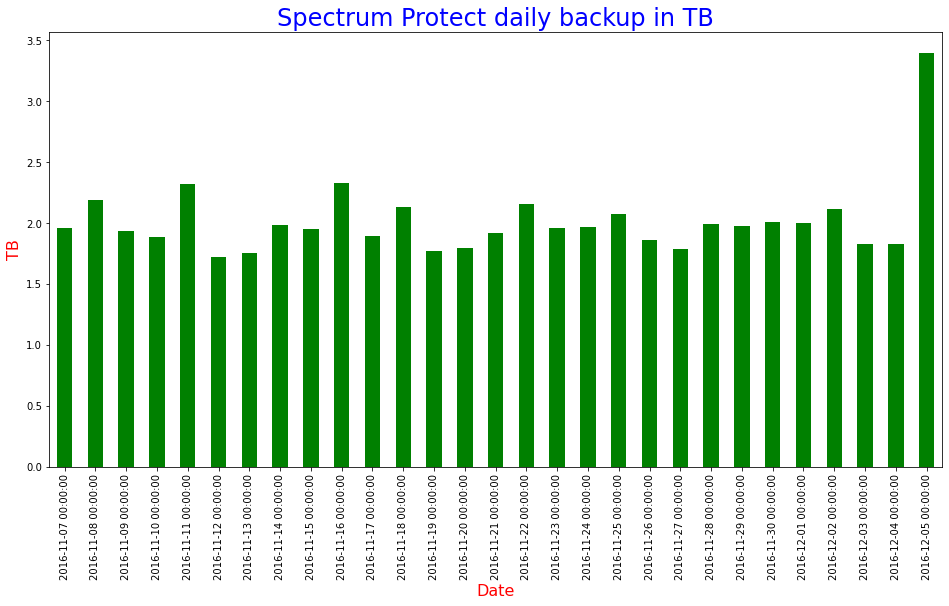

In [32]:
tb_dbkup.plot(kind='bar', color='green' , linewidth=3.0 , figsize=(16,8))

plt.title("Spectrum Protect daily backup in TB", fontsize=24, color='blue')
plt.xlabel("Date", fontsize=16, color='red')
plt.ylabel("TB", fontsize=16, color='red')

### Using a line graph to plot the TB per day restore by this Spectrum Protect instance

Text(0, 0.5, 'TB')

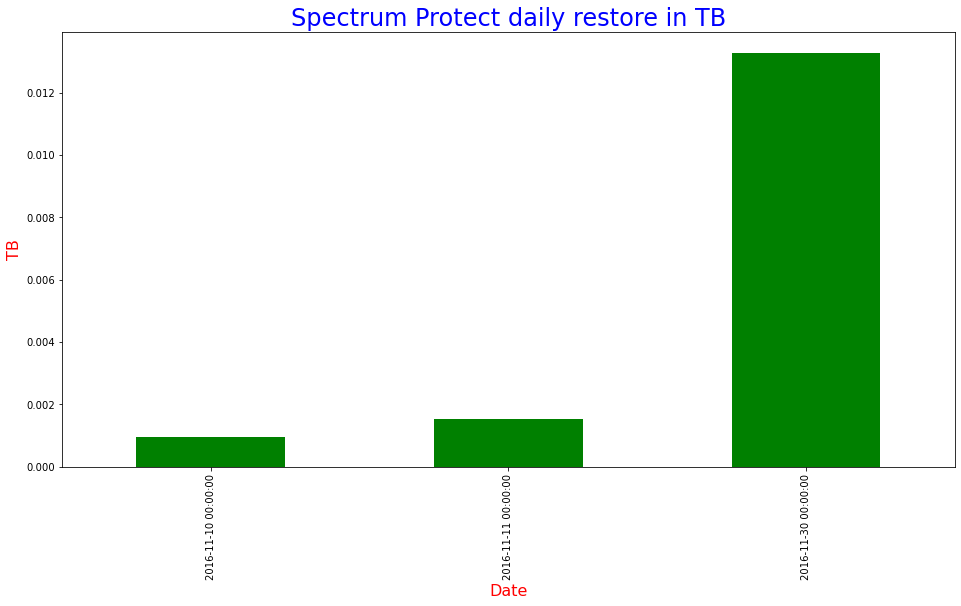

In [33]:
tb_drestore.plot(kind='bar', color='green' , linewidth=3.0 , figsize=(16,8))

plt.title("Spectrum Protect daily restore in TB", fontsize=24, color='blue')
plt.xlabel("Date", fontsize=16, color='red')
plt.ylabel("TB", fontsize=16, color='red')